In [1]:
import os
import json


import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import Polygon

import numpy as np
import xarray as xr
import rioxarray as rxr

import geoviews as gv
import geoviews.feature as gf
import hvplot.pandas

import s3fs

In [2]:
def find_granule_by_point(input_point, label='single_point'):
    '''returns url for the granule (zarr datacube) containing a specified point. point must be passed in epsg:4326
    '''
    catalog = gpd.read_file('https://its-live-data.s3.amazonaws.com/datacubes/catalog_v02.json')

    #make shapely point of input point
    p = gpd.GeoSeries([Point(input_point[0], input_point[1])],crs='EPSG:4326')
    #make gdf of point
    gdf = gdf = gpd.GeoDataFrame({'label': f'{label}', 
                                  'geometry':p})

    #find row of granule 
    granule = catalog.sjoin(gdf, how='inner')

    url = granule['zarr_url'].values[0]
    return url

In [6]:
catalog = gpd.read_file('https://its-live-data.s3.amazonaws.com/datacubes/catalog_v02.json')

In [7]:
hel_pt = gpd.read_file('/media/laserglaciers/upernavik/its_live_tutorial/geoms/helheim_pt_4326.shp')
hel_pt.geometry.bounds.iloc[0,:2].values

array([-38.24307296,  66.37204273])

In [40]:
hel_pt

,id,geometry
0,None,POINT (-38.24307 66.37204)


In [8]:
granule = catalog.sjoin(hel_pt, how='inner')

url = granule['zarr_url'].values[0]

In [9]:
url

'http://its-live-data.s3.amazonaws.com/datacubes/v2/N60W030/ITS_LIVE_vel_EPSG3413_G0120_X350000_Y-2550000.zarr'

In [10]:
def read_in_s3(http_url, chunks='auto'):
    ''' does some string formatting from zarr url and returns xarray dataset
    '''

    s3_url = http_url.replace('http','s3')
    s3_url = s3_url.replace('.s3.amazonaws.com','')

    datacube = xr.open_dataset(s3_url, engine='zarr',
                               storage_options={'anon':True},
                               chunks=chunks)
    return datacube

In [11]:
# hel = read_in_s3(url,chunks={'mid_date': 100})
hel = read_in_s3(url)

In [13]:
hel

<xarray.Dataset>
Dimensions:                     (mid_date: 58331, y: 833, x: 834)
Coordinates:
  * mid_date                    (mid_date) datetime64[ns] 2020-01-27T02:19:50...
  * x                           (x) float64 3.001e+05 3.002e+05 ... 4e+05
  * y                           (y) float64 -2.5e+06 -2.5e+06 ... -2.6e+06
Data variables: (12/60)
    M11                         (mid_date, y, x) float32 dask.array<chunksize=(40000, 20, 20), meta=np.ndarray>
    M11_dr_to_vr_factor         (mid_date) float32 dask.array<chunksize=(58331,), meta=np.ndarray>
    M12                         (mid_date, y, x) float32 dask.array<chunksize=(40000, 20, 20), meta=np.ndarray>
    M12_dr_to_vr_factor         (mid_date) float32 dask.array<chunksize=(58331,), meta=np.ndarray>
    acquisition_date_img1       (mid_date) datetime64[ns] dask.array<chunksize=(58331,), meta=np.ndarray>
    acquisition_date_img2       (mid_date) datetime64[ns] dask.array<chunksize=(58331,), meta=np.ndarray>
    ...                          ...
    vy_error_modeled            (mid_date) float32 dask.array<chunksize=(58331,), meta=np.ndarray>
    vy_error_slow               (mid_date) float32 dask.array<chunksize=(58331,), meta=np.ndarray>
    vy_error_stationary         (mid_date) float32 dask.array<chunksize=(58331,), meta=np.ndarray>
    vy_stable_shift             (mid_date) float32 dask.array<chunksize=(58331,), meta=np.ndarray>
    vy_stable_shift_slow        (mid_date) float32 dask.array<chunksize=(58331,), meta=np.ndarray>
    vy_stable_shift_stationary  (mid_date) float32 dask.array<chunksize=(58331,), meta=np.ndarray>
Attributes: (12/19)
    Conventions:                CF-1.8
    GDAL_AREA_OR_POINT:         Area
    author:                     ITS_LIVE, a NASA MEaSUREs project (its-live.j...
    autoRIFT_parameter_file:    http://its-live-data.s3.amazonaws.com/autorif...
    datacube_software_version:  1.0
    date_created:               03-Oct-2023 04:38:53
    ...                         ...
    s3:                         s3://its-live-data/datacubes/v2/N60W030/ITS_L...
    skipped_granules:           s3://its-live-data/datacubes/v2/N60W030/ITS_L...
    time_standard_img1:         UTC
    time_standard_img2:         UTC
    title:                      ITS_LIVE datacube of image pair velocities
    url:                        https://its-live-data.s3.amazonaws.com/datacu...

In [14]:
d1 = np.datetime64('2020')
d2 = np.datetime64('2023')
test = hel.mid_date.where(hel.mid_date>d1,drop=True)

In [15]:
len(test)

30522

In [16]:
hel

<xarray.Dataset>
Dimensions:                     (mid_date: 58331, y: 833, x: 834)
Coordinates:
  * mid_date                    (mid_date) datetime64[ns] 2020-01-27T02:19:50...
  * x                           (x) float64 3.001e+05 3.002e+05 ... 4e+05
  * y                           (y) float64 -2.5e+06 -2.5e+06 ... -2.6e+06
Data variables: (12/60)
    M11                         (mid_date, y, x) float32 dask.array<chunksize=(40000, 20, 20), meta=np.ndarray>
    M11_dr_to_vr_factor         (mid_date) float32 dask.array<chunksize=(58331,), meta=np.ndarray>
    M12                         (mid_date, y, x) float32 dask.array<chunksize=(40000, 20, 20), meta=np.ndarray>
    M12_dr_to_vr_factor         (mid_date) float32 dask.array<chunksize=(58331,), meta=np.ndarray>
    acquisition_date_img1       (mid_date) datetime64[ns] dask.array<chunksize=(58331,), meta=np.ndarray>
    acquisition_date_img2       (mid_date) datetime64[ns] dask.array<chunksize=(58331,), meta=np.ndarray>
    ...                          ...
    vy_error_modeled            (mid_date) float32 dask.array<chunksize=(58331,), meta=np.ndarray>
    vy_error_slow               (mid_date) float32 dask.array<chunksize=(58331,), meta=np.ndarray>
    vy_error_stationary         (mid_date) float32 dask.array<chunksize=(58331,), meta=np.ndarray>
    vy_stable_shift             (mid_date) float32 dask.array<chunksize=(58331,), meta=np.ndarray>
    vy_stable_shift_slow        (mid_date) float32 dask.array<chunksize=(58331,), meta=np.ndarray>
    vy_stable_shift_stationary  (mid_date) float32 dask.array<chunksize=(58331,), meta=np.ndarray>
Attributes: (12/19)
    Conventions:                CF-1.8
    GDAL_AREA_OR_POINT:         Area
    author:                     ITS_LIVE, a NASA MEaSUREs project (its-live.j...
    autoRIFT_parameter_file:    http://its-live-data.s3.amazonaws.com/autorif...
    datacube_software_version:  1.0
    date_created:               03-Oct-2023 04:38:53
    ...                         ...
    s3:                         s3://its-live-data/datacubes/v2/N60W030/ITS_L...
    skipped_granules:           s3://its-live-data/datacubes/v2/N60W030/ITS_L...
    time_standard_img1:         UTC
    time_standard_img2:         UTC
    title:                      ITS_LIVE datacube of image pair velocities
    url:                        https://its-live-data.s3.amazonaws.com/datacu...

In [17]:
# hel.v.isel(mid_date=0).plot()

In [18]:
# hel.mid_date.sortby(hel['mid_date'])

In [19]:
# hel=hel.unify_chunks()
# hel.chunks
hel_sample = hel[['v','v_error']]
hel_sample['mid_date']

<xarray.DataArray 'mid_date' (mid_date: 58331)>
array(['2020-01-27T02:19:50.191015936', '2022-03-11T14:09:09.220224000',
       '2021-08-03T14:10:16.210604032', ..., '2016-05-23T14:00:01.645100032',
       '2017-04-24T14:00:18.564160000', '2017-10-25T13:58:52.009222912'],
      dtype='datetime64[ns]')
Coordinates:
  * mid_date  (mid_date) datetime64[ns] 2020-01-27T02:19:50.191015936 ... 201...
Attributes:
    description:    midpoint of image 1 and image 2 acquisition date and time...
    standard_name:  image_pair_center_date_with_time_separation

In [20]:
# hel_sample =  hel_sample.sortby('mid_date')

In [21]:
# hel = hel.unify_chunks()
# hel.chunks

In [22]:
hel_sample = hel_sample.chunk({"mid_date": len(hel_sample.mid_date)}) # setting the mid_date chunksize to the time dimensions helps A LOT

In [23]:
hel_sample.chunks

Frozen({'mid_date': (58331,), 'y': (20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 13), 'x': (20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 14)})

In [24]:
hel_sample.chunks
hel_sample = hel_sample.sortby('mid_date')

In [26]:
hel_sample

<xarray.Dataset>
Dimensions:   (mid_date: 58331, y: 833, x: 834)
Coordinates:
  * mid_date  (mid_date) datetime64[ns] 1985-04-06T01:20:41.242861952 ... 202...
  * x         (x) float64 3.001e+05 3.002e+05 3.003e+05 ... 3.999e+05 4e+05
  * y         (y) float64 -2.5e+06 -2.5e+06 -2.5e+06 ... -2.6e+06 -2.6e+06
Data variables:
    v         (mid_date, y, x) float32 dask.array<chunksize=(58331, 20, 20), meta=np.ndarray>
    v_error   (mid_date, y, x) float32 dask.array<chunksize=(58331, 20, 20), meta=np.ndarray>
Attributes: (12/19)
    Conventions:                CF-1.8
    GDAL_AREA_OR_POINT:         Area
    author:                     ITS_LIVE, a NASA MEaSUREs project (its-live.j...
    autoRIFT_parameter_file:    http://its-live-data.s3.amazonaws.com/autorif...
    datacube_software_version:  1.0
    date_created:               03-Oct-2023 04:38:53
    ...                         ...
    s3:                         s3://its-live-data/datacubes/v2/N60W030/ITS_L...
    skipped_granules:           s3://its-live-data/datacubes/v2/N60W030/ITS_L...
    time_standard_img1:         UTC
    time_standard_img2:         UTC
    title:                      ITS_LIVE datacube of image pair velocities
    url:                        https://its-live-data.s3.amazonaws.com/datacu...

In [27]:
# hel_sample.isel(mid_date=50000).v.plot()

In [28]:
# read in helheim pt in 3413
# hel_3413 = gpd.read_file('geoms/helheim_pt_3413.gpkg')
hel_3413 = gpd.read_file('/media/laserglaciers/upernavik/leigh_agu_2023/geoms/10km_ish_pt.shp')
xy = hel_3413.geometry.bounds[hel_3413.geometry.bounds.columns[:2]].rename(columns={'minx':'x','miny':'y'})
xy

,x,y
0,300552.002401,-2.575379e+06


In [29]:
x, y = xy['x'][0],xy['y'][0]
vel_sample = hel_sample.sel(x=x,y=y,method='nearest')

In [30]:
vel_sample

<xarray.Dataset>
Dimensions:   (mid_date: 58331)
Coordinates:
  * mid_date  (mid_date) datetime64[ns] 1985-04-06T01:20:41.242861952 ... 202...
    x         float64 3.005e+05
    y         float64 -2.575e+06
Data variables:
    v         (mid_date) float32 dask.array<chunksize=(58331,), meta=np.ndarray>
    v_error   (mid_date) float32 dask.array<chunksize=(58331,), meta=np.ndarray>
Attributes: (12/19)
    Conventions:                CF-1.8
    GDAL_AREA_OR_POINT:         Area
    author:                     ITS_LIVE, a NASA MEaSUREs project (its-live.j...
    autoRIFT_parameter_file:    http://its-live-data.s3.amazonaws.com/autorif...
    datacube_software_version:  1.0
    date_created:               03-Oct-2023 04:38:53
    ...                         ...
    s3:                         s3://its-live-data/datacubes/v2/N60W030/ITS_L...
    skipped_granules:           s3://its-live-data/datacubes/v2/N60W030/ITS_L...
    time_standard_img1:         UTC
    time_standard_img2:         UTC
    title:                      ITS_LIVE datacube of image pair velocities
    url:                        https://its-live-data.s3.amazonaws.com/datacu...

<ErrorbarContainer object of 3 artists>

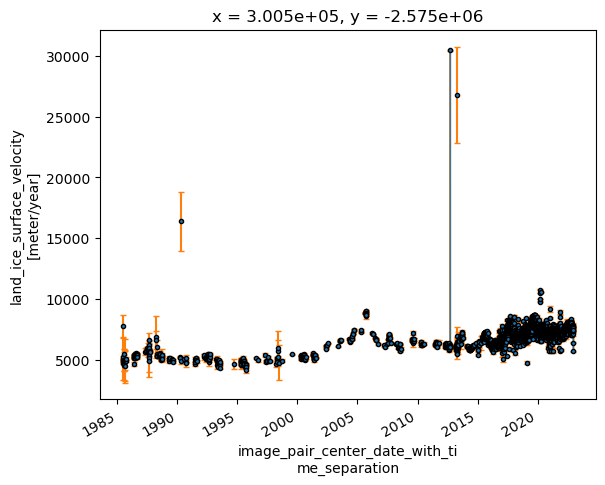

In [31]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
vel_plot = vel_sample.v.plot.line('-o',x='mid_date', linewidth=1,markeredgecolor='k',markersize=3,ax=ax,zorder=2)
ax.errorbar(vel_sample.mid_date.values,vel_sample.v.values,yerr = vel_sample.v_error.values, capsize=2,zorder=1)

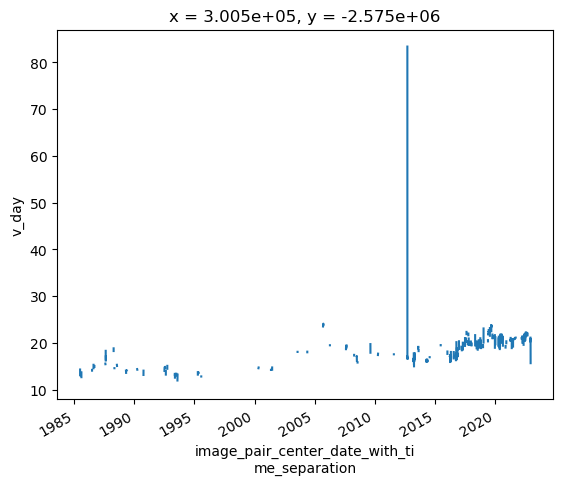

In [32]:
vel_sample['v_day'] = vel_sample.v/365
vel_sample.v_day.plot()

In [33]:
x

300552.0024013915

In [34]:
vel_sample_df = vel_sample.to_dataframe()
op = '/media/laserglaciers/upernavik/leigh_agu_2023/its_live/helheim_velocity_its_live.csv'
vel_sample_df.to_csv(op)

In [35]:
vel_sample_df

,v,v_error,x,y,v_day
mid_date,,,,,
1985-04-06 01:20:41.242861952,NaN,NaN,300532.5,-2575372.5,NaN
1985-04-29 01:26:46.332462976,NaN,NaN,300532.5,-2575372.5,NaN
1985-04-29 01:27:10.382973056,NaN,NaN,300532.5,-2575372.5,NaN
1985-04-30 01:20:36.151852992,NaN,NaN,300532.5,-2575372.5,NaN
1985-05-03 13:23:41.209350016,NaN,NaN,300532.5,-2575372.5,NaN
...,...,...,...,...,...
2022-12-18 14:00:28.334618880,7712.0,88.0,300532.5,-2575372.5,21.128767
2022-12-21 08:47:42.042579968,NaN,NaN,300532.5,-2575372.5,NaN
2022-12-22 14:00:01.487764992,7613.0,92.0,300532.5,-2575372.5,20.857534


<ErrorbarContainer object of 3 artists>

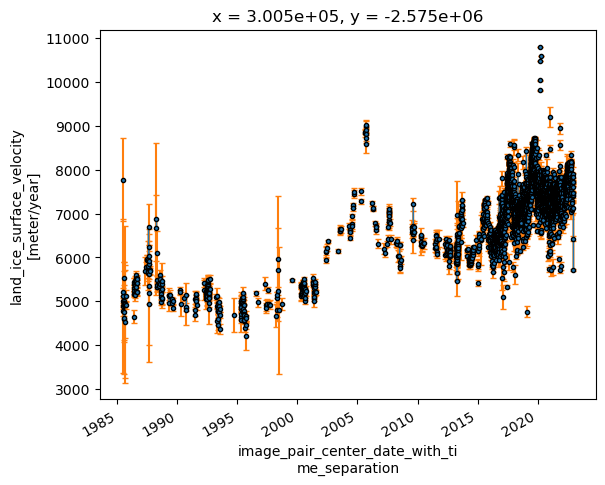

In [36]:
fig, ax = plt.subplots()
vel_sample.v.data = np.where(vel_sample.v<16e3,vel_sample.v,np.nan)
vel_plot = vel_sample.v.plot.line('-o',x='mid_date', linewidth=1,markeredgecolor='k',markersize=3,ax=ax,zorder=2)
ax.errorbar(vel_sample.mid_date.values,vel_sample.v.values,yerr = vel_sample.v_error.values, capsize=2,zorder=1)

In [37]:
vel_sample_df_v2 = vel_sample.to_dataframe()
op = '/media/laserglaciers/upernavik/leigh_agu_2023/its_live/helheim_velocity_its_live_10km.csv'
vel_sample_df_v2.to_csv(op)

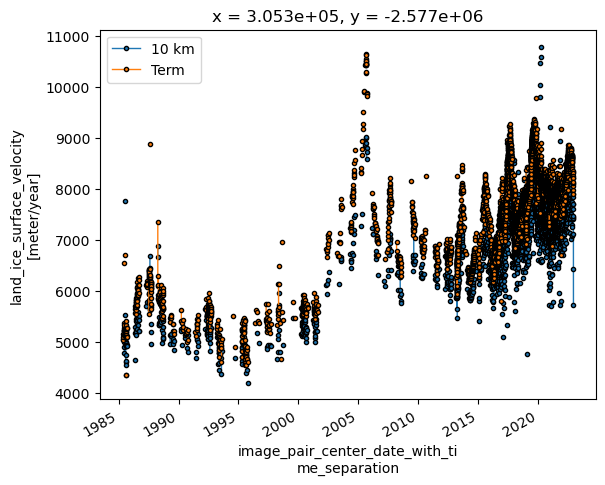

In [38]:
hel_3413_term = gpd.read_file('geoms/helheim_pt_3413.gpkg')
xy_term = hel_3413_term.geometry.bounds[hel_3413_term.geometry.bounds.columns[:2]].rename(columns={'minx':'x','miny':'y'})
x_term, y_term = xy_term['x'][0], xy_term['y'][0]
vel_sample_term = hel_sample.sel(x=x_term, y=y_term,method='nearest')

fig, ax = plt.subplots()
vel_plot_10km = vel_sample.v.plot.line('-o',x='mid_date', linewidth=1,markeredgecolor='k',markersize=3,ax=ax,zorder=2,label='10 km')
vel_plot_term = vel_sample_term.v.plot.line('-o',x='mid_date', linewidth=1,markeredgecolor='k',markersize=3,ax=ax,zorder=2, label='Term')
ax.legend()

In [39]:
# fig.savefig('/media/laserglaciers/upernavik/leigh_agu_2023/its_live_comp.png',dpi=300)